Exercise 3 (Chapter 5)

In [ ]:
answer -    Take the dataset and split it into k different datasets and one of them would be used as an 
            validation set and the remaining datasets as the training sets. 
            You finally take the average of all the sets to get the mean squared error.

Exercise 8 (Chapter 5)

In [2]:
set.seed(1)
x = rnorm(100)
y = rnorm(100)
y = x - 2 * x^2 + rnorm(100)

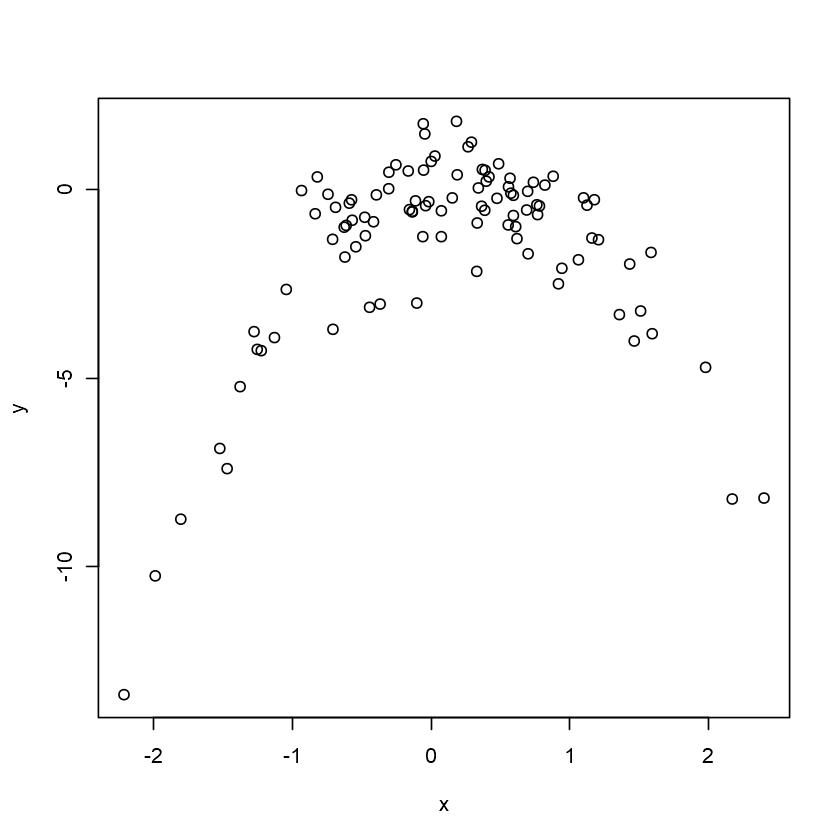

In [3]:
plot(x, y)

In [4]:
library(boot)
data = data.frame(x, y)
set.seed(1)
glm.fit = glm(y ~ x)
cv.glm(data, glm.fit)$delta

[1] 6.923056 6.919616

In [5]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(data, glm.fit)$delta

[1] 1.128194 1.127826

In [6]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(data, glm.fit)$delta

[1] 1.084727 1.084337

In [7]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(data, glm.fit)$delta

[1] 1.097829 1.097252

d

In [8]:
set.seed(10)
glm.fit = glm(y ~ x)
cv.glm(data, glm.fit)$delta

[1] 6.923056 6.919616

In [9]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(data, glm.fit)$delta

[1] 1.128194 1.127826

In [10]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(data, glm.fit)$delta

[1] 1.084727 1.084337

In [11]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

ERROR: Error in nrow(data): object 'Data' not found


f

In [12]:
summary(glm.fit)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9153  -0.5277   0.1137   0.6562   2.3045  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4825     0.1023 -14.489  < 2e-16 ***
poly(x, 4)1   6.3875     1.0232   6.242  1.2e-08 ***
poly(x, 4)2 -22.8002     1.0232 -22.282  < 2e-16 ***
poly(x, 4)3   2.1839     1.0232   2.134   0.0354 *  
poly(x, 4)4  -1.2613     1.0232  -1.233   0.2207    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.047015)

    Null deviance: 666.475  on 99  degrees of freedom
Residual deviance:  99.466  on 95  degrees of freedom
AIC: 295.25

Number of Fisher Scoring iterations: 2


Exercise 1 (Chapter 6)

In [ ]:
The best subset will have the smallest training RSS because the stepwise 
first picks a variable and then iterate through the models.

In [ ]:
The best subset will have the smallest test RSS

Exercise 10 (Chapter 7)

In [15]:
set.seed(1)
library(ISLR)
library(leaps)
attach(College)

Warning message:
"package 'leaps' was built under R version 3.6.2"

In [16]:
train = sample(length(Outstate), length(Outstate)/2)
test = -train
College.train = College[train, ]
College.test = College[test, ]

In [17]:
reg.fit = regsubsets(Outstate ~ ., data = College.train, nvmax = 17, method = "forward")



In [18]:
summary(reg.fit)

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = College.train, nvmax = 17, 
    method = "forward")
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 17
Selection Algorithm: forward
          PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 )  " "        " "  " "    " "    " "       " "       " "        
2  ( 1 )  " "        " "  " "    " "    " "      

b

In [21]:
library(gam)

Warning message:
"package 'gam' was built under R version 3.6.2"Loading required package: splines
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.6.2"Loaded gam 1.16.1



In [22]:
gam.fit = gam(Outstate ~ Private + s(Room.Board, df = 2) + s(PhD, df = 2) + 
    s(perc.alumni, df = 2) + s(Expend, df = 5) + s(Grad.Rate, df = 2), data = College.train)

Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

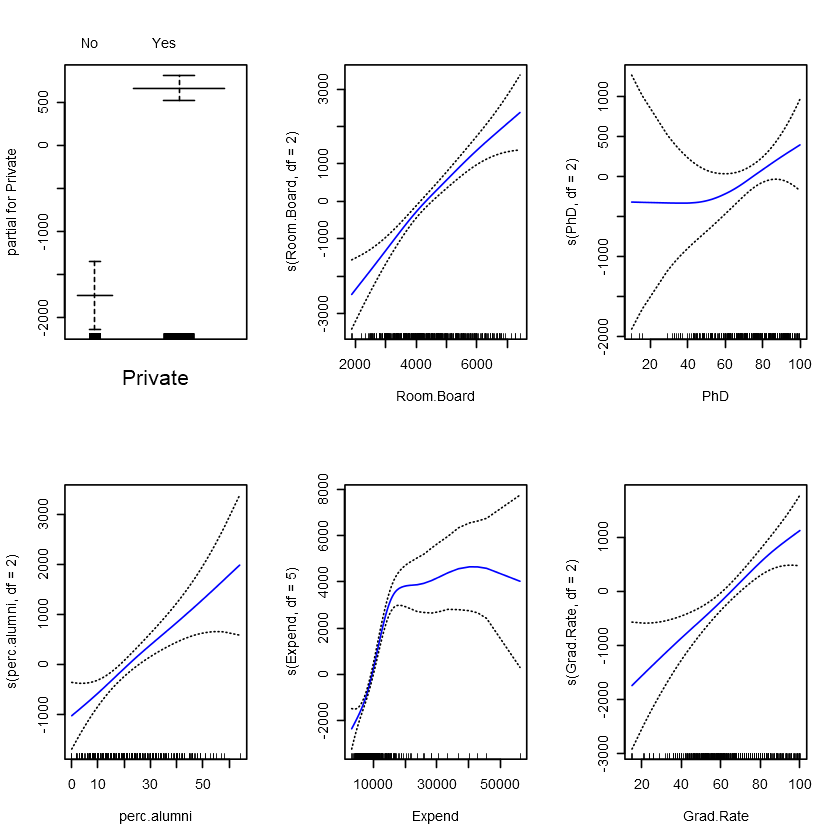

In [23]:
par(mfrow = c(2, 3))
plot(gam.fit, se = T, col = "blue")

c

In [24]:
gam.pred = predict(gam.fit, College.test)
gam.err = mean((College.test$Outstate - gam.pred)^2)
gam.err

[1] 3349290

In [25]:
gam.tss = mean((College.test$Outstate - mean(College.test$Outstate))^2)
test.rss = 1 - gam.err/gam.tss
test.rss

[1] 0.7660016

d

In [26]:
summary(gam.fit)



Call: gam(formula = Outstate ~ Private + s(Room.Board, df = 2) + s(PhD, 
    df = 2) + s(perc.alumni, df = 2) + s(Expend, df = 5) + s(Grad.Rate, 
    df = 2), data = College.train)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-7402.89 -1114.45   -12.67  1282.69  7470.60 

(Dispersion Parameter for gaussian family taken to be 3711182)

    Null Deviance: 6989966760 on 387 degrees of freedom
Residual Deviance: 1384271126 on 373 degrees of freedom
AIC: 6987.021 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                        Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private                  1 1778718277 1778718277 479.286 < 2.2e-16 ***
s(Room.Board, df = 2)    1 1577115244 1577115244 424.963 < 2.2e-16 ***
s(PhD, df = 2)           1  322431195  322431195  86.881 < 2.2e-16 ***
s(perc.alumni, df = 2)   1  336869281  336869281  90.771 < 2.2e-16 ***
s(Expend, df = 5)        1  530538753  530538753 142.957 < 2.2e-16 ***
s(Grad.Rate, df = 